In [1]:
# author: Fahim Tajwar

from label_loader import *
from image_loader import *
from util import *
from models import *
from model_trainer import *
from dataset import *

In [2]:
file_name_1 = '/Users/fahimtajwar/Academics/cs231/labels_cells_only.xlsx'
file_name_2 = '/Users/fahimtajwar/Academics/cs231/classes_800.xlsx'
file_names = [file_name_1, file_name_2]

label_reader = Label_Reader(file_names)
weight_vector = label_reader.get_weight_vector()
print(label_reader.get_all_labels())
print(label_reader.get_label_to_label_id_map())
print(weight_vector)

{'grows sparse', 'grows dense', 'cell dies'}
{'grows sparse': 0, 'grows dense': 1, 'cell dies': 2}
tensor([0.0097, 0.0294, 0.0260])


In [3]:
prefix = "/Users/fahimtajwar/Academics/cs231/project_data_well_2/well2_data/well"
suffix = "_well.png"

all_well_ids = label_reader.get_all_well_ids()
si = Single_Image_Loader(5, all_well_ids, prefix, suffix)
tensor = si.get_image_tensor()
well_id_to_image_id_map = si.get_well_to_image_id_map()
print(tensor.shape)
print(well_id_to_image_id_map)

torch.Size([351, 3, 224, 224])
{1004: 0, 1006: 1, 1015: 2, 1016: 3, 1018: 4, 1019: 5, 1023: 6, 1027: 7, 1036: 8, 1037: 9, 1046: 10, 1055: 11, 1060: 12, 1062: 13, 1063: 14, 1064: 15, 1078: 16, 1086: 17, 1091: 18, 1098: 19, 1100: 20, 1111: 21, 1122: 22, 1125: 23, 1130: 24, 1134: 25, 1141: 26, 1142: 27, 1146: 28, 1153: 29, 1171: 30, 1175: 31, 1176: 32, 1187: 33, 1194: 34, 1233: 35, 1242: 36, 1254: 37, 1265: 38, 1303: 39, 1324: 40, 1327: 41, 1337: 42, 1389: 43, 1416: 44, 1432: 45, 1457: 46, 1460: 47, 1476: 48, 1480: 49, 1516: 50, 1520: 51, 1524: 52, 1569: 53, 1591: 54, 1600: 55, 1607: 56, 1608: 57, 1611: 58, 1614: 59, 1622: 60, 1644: 61, 1646: 62, 1667: 63, 1672: 64, 1679: 65, 1685: 66, 1689: 67, 1693: 68, 1714: 69, 1719: 70, 1733: 71, 1736: 72, 1739: 73, 1754: 74, 1770: 75, 1771: 76, 1772: 77, 1775: 78, 1779: 79, 1784: 80, 1785: 81, 1786: 82, 1791: 83, 1794: 84, 1801: 85, 1804: 86, 1806: 87, 1807: 88, 1811: 89, 1812: 90, 1813: 91, 1815: 92, 1819: 93, 1824: 94, 1825: 95, 1828: 96, 1829: 97

In [4]:
input_size = 3 * 224 * 224
num_classes = 3

label_to_label_id = label_reader.label_to_label_id
label_id_to_label_map = label_reader.get_label_id_to_label_map()
#print(label_id_to_label_map)

Y_label = label_reader.get_label_map()
for key in Y_label:
    Y_label[key] = label_to_label_id[Y_label[key]]

#print(Y_label)

label_id_train, label_id_val, label_id_test = get_dataset_split(Y_label)
print(len(label_id_train))
print(label_id_train)
print(len(label_id_val))
print(len(label_id_train))

280
[1739 2847  358 2164  183  317 1824 1327  724 1608 2278 2291  153 2541
 2839   75  614 1062  753 2111 1829  134 1480 2870  559   68 2299   17
  206  399 1130 1457 1122 1815 1679 2346  167 1983  683 1125 1142  272
 1098  536 1835 1693 1775 1801 2810 2820 2991 1979 2569 1838 1015  767
 2124  278  667 1870 1432 2866 1027 2096 2147 2501   62 1646 2179  785
 2424 1018  677 2971 1004  360 2693 1303 1134 2137  587  325 2406  542
 1998 2438 2853 1460 2393 1714 2029  755 1934 1876  561  136 1913 1055
  389 1100 1736 2107 1825 1233  381 1831 2388 1719 1945  101 1893  593
 1153 1667  128 2972 2344 1171 2023 2239   29 2361 1828 2387 1516 1622
 1046 2986 1967 2253 1078 1754 2800 2862 1242 2625   98  623 2640 1064
  464 2881 1857 1958 1187  121  201 1811 2114  221  371  326 1019  269
 1859  525  569 1063 1037 2337 1175 1176  635  499  255  329 1006 2017
  374 2199 1524 2135   76  456 2832  418  159 2939 1036 1819 1833  696
 1794 1947 2899 1111 1804   91  384 1813  412 2432   42  391 2684 2942
 2

In [5]:
training_set = Augmented_Dataset(tensor, label_id_train, Y_label, well_id_to_image_id_map, 
                                 final_transformation_choice)
validation_set = Augmented_Dataset(tensor, label_id_val, Y_label, well_id_to_image_id_map, transform_normalization)
test_set = Augmented_Dataset(tensor, label_id_test, Y_label, well_id_to_image_id_map, transform_normalization)

In [6]:
training_batch_size = 320
validation_batch_size = 1
test_batch_size = 1
learning_rate = 0.000001

validation_loader = torch.utils.data.DataLoader(dataset = validation_set, 
                                          batch_size = validation_batch_size, 
                                          shuffle = False)
test_loader = torch.utils.data.DataLoader(dataset = test_set, 
                                          batch_size = test_batch_size, 
                                          shuffle = False)

In [7]:
conv_net_2 = Our2DConvNetDesign2(num_classes = 3)
model_2 = Model(conv_net_2, training_set, training_batch_size, learning_rate, label_id_to_label_map, 
              weight = weight_vector, imbalanced_class = True, num_epochs = 30, verbose = True)

Epoch: [1/30], Loss: 1.1472
Epoch: [2/30], Loss: 1.1586
Epoch: [3/30], Loss: 1.1063
Epoch: [4/30], Loss: 1.1368
Epoch: [5/30], Loss: 1.1312
Epoch: [6/30], Loss: 1.1581
Epoch: [7/30], Loss: 1.1416
Epoch: [8/30], Loss: 1.1493
Epoch: [9/30], Loss: 1.1259
Epoch: [10/30], Loss: 1.1339
Epoch: [11/30], Loss: 1.1351
Epoch: [12/30], Loss: 1.1378
Epoch: [13/30], Loss: 1.1312
Epoch: [14/30], Loss: 1.1487
Epoch: [15/30], Loss: 1.1597
Epoch: [16/30], Loss: 1.1351
Epoch: [17/30], Loss: 1.1577
Epoch: [18/30], Loss: 1.1326
Epoch: [19/30], Loss: 1.1331
Epoch: [20/30], Loss: 1.1321
Epoch: [21/30], Loss: 1.1386
Epoch: [22/30], Loss: 1.1311
Epoch: [23/30], Loss: 1.1421
Epoch: [24/30], Loss: 1.1273
Epoch: [25/30], Loss: 1.1432
Epoch: [26/30], Loss: 1.1408
Epoch: [27/30], Loss: 1.1199
Epoch: [28/30], Loss: 1.1377
Epoch: [29/30], Loss: 1.1126
Epoch: [30/30], Loss: 1.1564
Training done!


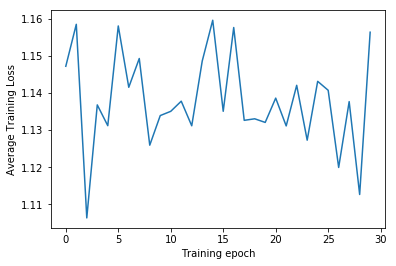

accuracy : 25.000000

Frequency per class:  {'cell dies': 61, 'grows sparse': 164, 'grows dense': 55}


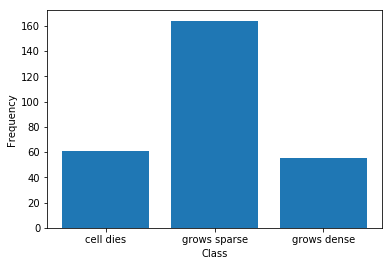

Number of datapoints we got correct per class {'cell dies': 45, 'grows sparse': 18, 'grows dense': 7}
Accuracy per class {'cell dies': 0.7377049180327869, 'grows sparse': 0.10975609756097561, 'grows dense': 0.12727272727272726}


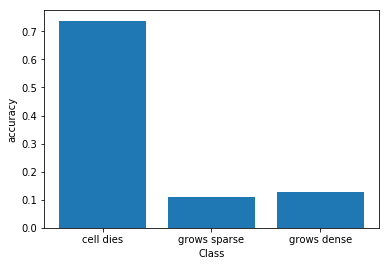

0.0103049689215223

In [8]:
model_2.train()

accuracy : 31.000000

Frequency per class:  {'cell dies': 7, 'grows sparse': 22, 'grows dense': 6}


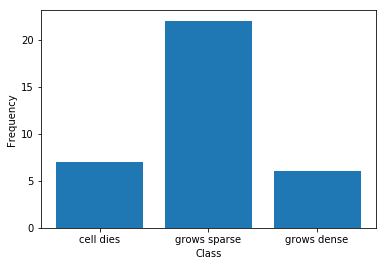

Number of datapoints we got correct per class {'cell dies': 7, 'grows sparse': 2, 'grows dense': 2}
Accuracy per class {'cell dies': 1.0, 'grows sparse': 0.09090909090909091, 'grows dense': 0.3333333333333333}


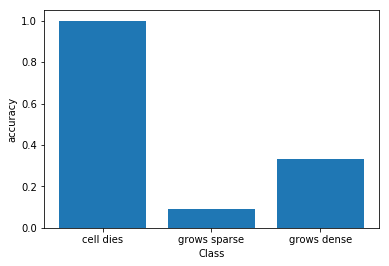

0.030303030303030304

In [9]:
model_2.test(validation_loader)

accuracy : 17.000000

Frequency per class:  {'grows sparse': 24, 'cell dies': 2, 'grows dense': 9}


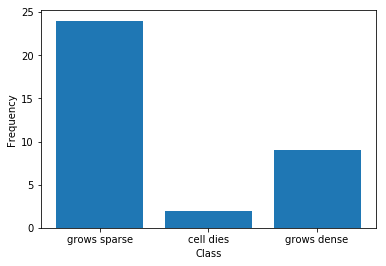

Number of datapoints we got correct per class {'grows sparse': 2, 'cell dies': 1, 'grows dense': 3}
Accuracy per class {'grows sparse': 0.08333333333333333, 'cell dies': 0.5, 'grows dense': 0.3333333333333333}


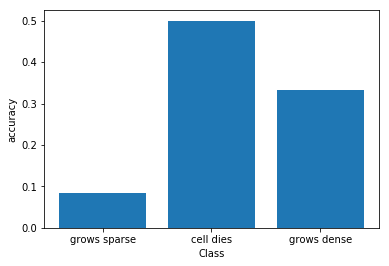

0.013888888888888888

In [10]:
model_2.test(test_loader)